In [19]:
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")
sns.set_context("notebook")
import pyreadr

In [14]:
dir_path = "Z:/JulietteG/6-Etutes_Antares/ERAA_sim/user/"

In [15]:
area = "2_at00_hydro_open"

# Gain

In [47]:
reward = pyreadr.read_r(dir_path+"reward_"+area+".RData")["df_vu"]

In [48]:
reward["Simulations"] = reward["method"].apply(lambda x:int(x.split("sim_")[0]))
reward["Interpolation"] = reward["method"].apply(lambda x:"Basic" if x.split("sim_")[1]=="old" else "Marginal prices")
reward.rename(columns={'mcYear': 'Scenario', 'timeId': 'Week', 'reward':'Reward','control':"Control"}, inplace=True)
reward.sort_values(by=["Scenario","Week","Simulations"],inplace=True)
reward["Simulations"] = reward["Simulations"].apply(lambda x:str(x))

In [49]:
reward

,Scenario,Week,Reward,Control,method,Simulations,Interpolation
38480,1,1.0,-4.121111e+07,-322182.0,1sim_new,1,Marginal prices
38481,1,1.0,-3.896248e+07,-307537.0,1sim_new,1,Marginal prices
38482,1,1.0,-3.671488e+07,-292893.0,1sim_new,1,Marginal prices
38483,1,1.0,-3.448562e+07,-278248.0,1sim_new,1,Marginal prices
38484,1,1.0,-3.228361e+07,-263603.0,1sim_new,1,Marginal prices
...,...,...,...,...,...,...,...
10395,10,52.0,2.402907e+07,267059.0,20sim_old,20,Basic
10396,10,52.0,2.415957e+07,305210.0,20sim_old,20,Basic
10397,10,52.0,2.416016e+07,343361.0,20sim_old,20,Basic
10398,10,52.0,2.416046e+07,381513.0,20sim_old,20,Basic


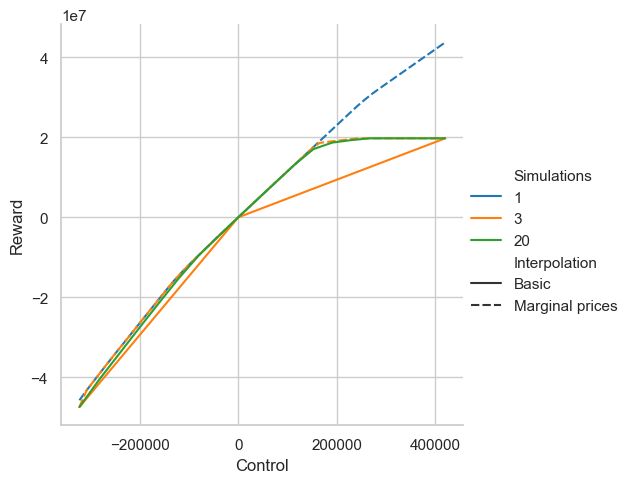

In [56]:
sns.relplot(kind="line",x="Control",y="Reward",data=reward[(reward.Week>=9)&(reward.Week<=9)&(reward.Scenario==1)],hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices"])

# Vu

In [75]:
vu = pyreadr.read_r(dir_path+"vu_"+area+".RData")["df_vu"]
vu.drop(columns=["statesid","value_node","level_low","level_high","value_node_dif","states_dif","vu_pen"],inplace=True)
vu_simple = pyreadr.read_r(dir_path+"vu_simple_"+area+".RData")['watervalues']
vu_simple.drop(columns=["statesid","level_low","level_high","mean","std","vu_pen"],inplace=True)
vu_simple["method"] = "simple"
vu = pd.concat([vu,vu_simple])

In [93]:
vu["Simulations"] = vu["method"].apply(lambda x:int(x.split("sim_")[0]) if x!="simple" else 1)
vu["Interpolation"] = vu["method"].apply(lambda x:"No DP" if x=="simple" else ("Basic" if x.split("sim_")[1]=="old" else "Marginal prices"))
vu.rename(columns={'weeks': 'Week', 'vu':'Watervalue','states':"Level"}, inplace=True)
vu.sort_values(by=["Week","Simulations"],inplace=True)
vu["Simulations"] = vu["Simulations"].apply(lambda x:str(x))
vu["Level"] = vu["Level"]/max(vu["Level"])*100

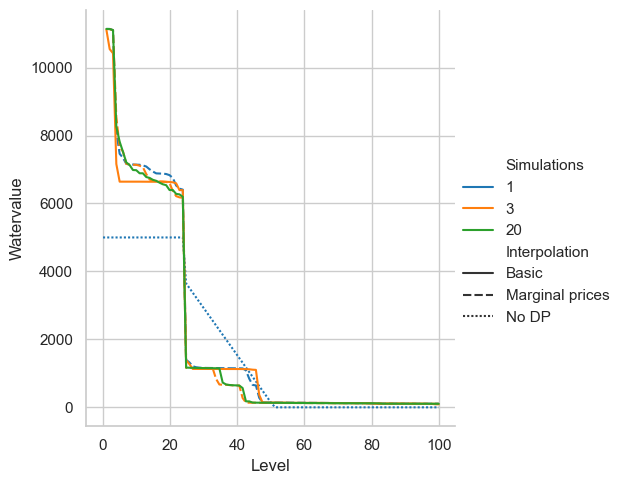

In [94]:
sns.relplot(kind="line",x="Level",y="Watervalue",data=vu[(vu.Week>=3)&(vu.Week<=3)].dropna(),hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices","No DP"])

# Test en simulation

In [140]:
result = pd.read_excel(dir_path+"coûts_"+area+".xlsx")

In [141]:
result["method"] = result["name"].apply(lambda x:x.split(area+"_")[1])
result["Simulations"] = result["method"].apply(lambda x:int(x.split("sim_")[0]) if x!="simple" else 1)
result["Interpolation"] = result["method"].apply(lambda x:"No DP" if x=="simple" else ("Basic" if x.split("sim_")[1]=="old" else "Marginal prices"))
result.rename(columns={'mcYear': 'Scenario', 'ov_cost':'Cost'}, inplace=True)
result["Simulations"] = result["Simulations"].apply(lambda x:str(x))
result.drop(columns=["name","unsp_cost"],inplace=True)

In [142]:
result.head(10)

,Scenario,Cost,method,Simulations,Interpolation
0,1,199661392995,1sim_new,1,Marginal prices
1,2,192581071139,1sim_new,1,Marginal prices
2,3,194611698878,1sim_new,1,Marginal prices
3,4,242798242681,1sim_new,1,Marginal prices
4,5,206718059000,1sim_new,1,Marginal prices
5,6,220133255462,1sim_new,1,Marginal prices
6,7,190915410615,1sim_new,1,Marginal prices
7,8,199851386882,1sim_new,1,Marginal prices
8,9,197090919960,1sim_new,1,Marginal prices
9,10,207521566185,1sim_new,1,Marginal prices


In [151]:
result_0 = result.loc[result.method=="simple",["Scenario","Cost"]]
result_0.rename(columns={'Cost':'Cost_0'},inplace=True)
result_gap = result.merge(result_0,on=["Scenario"])
result_gap["Gap cost"] = (result_gap["Cost"] -result_gap["Cost_0"])/result_gap["Cost_0"]*100

In [152]:
result_gap.head(10)

,Scenario,Cost,method,Simulations,Interpolation,Cost_0,Gap cost
0,1,199661392995,1sim_new,1,Marginal prices,199606160151,0.027671
1,1,199650293033,20sim_old,20,Basic,199606160151,0.022110
2,1,199658925683,3sim_new,3,Marginal prices,199606160151,0.026435
3,1,199658809047,3sim_old,3,Basic,199606160151,0.026376
4,1,199606160151,simple,1,No DP,199606160151,0.000000
5,2,192581071139,1sim_new,1,Marginal prices,192696136623,-0.059713
6,2,192582004144,20sim_old,20,Basic,192696136623,-0.059229
7,2,192578214665,3sim_new,3,Marginal prices,192696136623,-0.061196
8,2,192577769777,3sim_old,3,Basic,192696136623,-0.061427
9,2,192696136623,simple,1,No DP,192696136623,0.000000


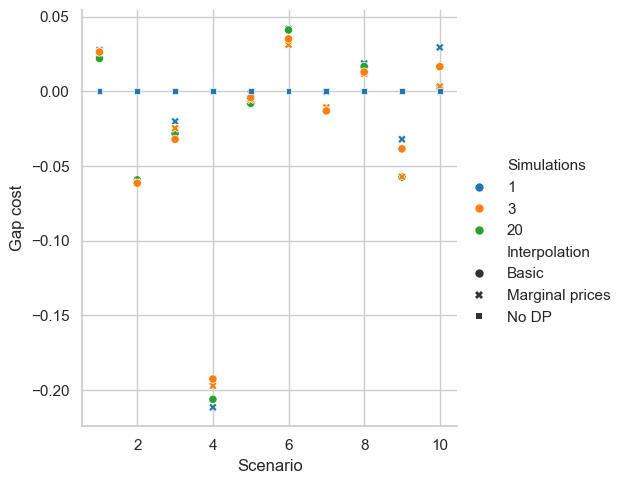

In [153]:
sns.relplot(kind="scatter",data=result_gap,x="Scenario",y="Gap cost",hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices","No DP"],hue_order=["1","3","20"])

In [146]:
result_mean = result_gap.loc[:,["method","Gap cost"]].groupby("method").mean().reset_index()
result_mean["Simulations"] = result_mean["method"].apply(lambda x:x.split("sim_")[0] if x!="simple" else "1")
result_mean["Interpolation"] = result_mean["method"].apply(lambda x:"No DP" if x=="simple" else ("Basic" if x.split("sim_")[1]=="old" else "Marginal prices"))

In [147]:
result_mean

,method,Gap cost,Simulations,Interpolation
0,1sim_new,-48952925.0,1,Marginal prices
1,20sim_old,-65131981.2,20,Basic
2,3sim_new,-63758729.9,3,Marginal prices
3,3sim_old,-56836508.8,3,Basic
4,simple,0.0,1,No DP
